Name: John Herrick \
Date: 1/14/23

# Crytpocurrency Analysis Using Historical Data

In [1]:
# Starting off by importing necessary modules.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Performing initial reading and examination of my data.

df = pd.read_csv(r"C:\Users\ripva\Desktop\Masters degree stuff\DSC540\Data\archive(1)\crypto-markets.csv")
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [3]:
# Using the 'slug' column for unique identifiers, I check the length of the set of the slug column values. I find this dataframe
# has over 2,000 unique crytpocurrencies for the dates spanned by this historical record. I'll have to trim that back a bit.

len(set(df.slug))

2071

In [4]:
# For my first of five required data transformations I will trim my massive dataframe down to just the top 10 cryptocurrencies
# in this file. I then present both the unique names in the top 10 using the set() function on my dataframe and also the number 
# of rows in my new dataframe to ensure I still have enough rows to meet my project requirements.

df_top_10 = df[df['ranknow'] <=10]
print(f"The unique cryptocurrencies in my dataframe are: \n{list(crypto for crypto in set(df_top_10.slug))}")
print(f"My new dataframe has {df_top_10.shape[0]} rows.")

The unique cryptocurrencies in my dataframe are: 
['bitcoin-sv', 'litecoin', 'bitcoin-cash', 'stellar', 'eos', 'cardano', 'ethereum', 'bitcoin', 'tether', 'ripple']
My new dataframe has 11644 rows.


In [5]:
# In the event I want to use any datetime functions on my data, I need to convert my date column from a string type (dytpe '0')
# using pd.to_datetime(). First I will demonstrate the necessity for this transformation by checking the dtype of my date 
# column.

df_top_10.date.dtype

dtype('O')

In [6]:
# Now I will perform the second of my five required data transformations by converting my date column string values into 
# date-time values. I demonstrate the new data type as well.

df_top_10.date = pd.to_datetime(df_top_10.date)
df_top_10.date.dtype

C:\Users\ripva\AppData\Local\Temp\ipykernel_16752\3083227219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10.date = pd.to_datetime(df_top_10.date)


dtype('<M8[ns]')

In [7]:
# Checking that my new dataframe looks as expected. All seems well.

df_top_10

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.037725,40704000.0,9.781065e+08,0.8160,0.01
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.035806,31641100.0,9.283447e+08,0.3210,0.01
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.036461,17966300.0,9.453295e+08,0.8236,0.00
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.042021,47624500.0,1.089471e+09,0.7253,0.01


In [8]:
# For my third of five required data transformations, I will create a column that calculates the daily mean value of the 
# cryptocurrency (in USD, since all crytpo-value representations in this dataframe are in terms of USD) based on the average 
# between its low and its high value for the day.

def crypto_mean(df):
    return (df.high + df.low)/2

df_top_10['mean'] = df_top_10.apply(crypto_mean, axis =1)
df_top_10

C:\Users\ripva\AppData\Local\Temp\ipykernel_16752\12029868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['mean'] = df_top_10.apply(crypto_mean, axis =1)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,mean
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.488567e+09,0.5438,3.88,134.040000
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.603769e+09,0.7813,13.49,140.745000
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.542813e+09,0.3843,12.88,140.490000
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.298955e+09,0.2882,32.17,123.805000
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.168517e+09,0.3881,33.32,108.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.037725,40704000.0,9.781065e+08,0.8160,0.01,0.035817
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.035806,31641100.0,9.283447e+08,0.3210,0.01,0.036748
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.036461,17966300.0,9.453295e+08,0.8236,0.00,0.035505
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.042021,47624500.0,1.089471e+09,0.7253,0.01,0.040309


In [9]:
# For my fourth of five required data transformations, I will create a column that tracks the total net change in the price of
# the cryptocurrency for the day by subtracting its opening price from its closing price.

def crypto_net(df):
    return (df.close - df.open)

df_top_10['net_change'] = df_top_10.apply(crypto_net, axis = 1)
df_top_10

C:\Users\ripva\AppData\Local\Temp\ipykernel_16752\1118609858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['net_change'] = df_top_10.apply(crypto_net, axis = 1)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,mean,net_change
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.488567e+09,0.5438,3.88,134.040000,-1.090000
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.603769e+09,0.7813,13.49,140.745000,10.100000
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.542813e+09,0.3843,12.88,140.490000,-5.000000
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.298955e+09,0.2882,32.17,123.805000,-22.010000
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.168517e+09,0.3881,33.32,108.940000,-11.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.037725,40704000.0,9.781065e+08,0.8160,0.01,0.035817,-0.000903
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.035806,31641100.0,9.283447e+08,0.3210,0.01,0.036748,-0.001955
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.036461,17966300.0,9.453295e+08,0.8236,0.00,0.035505,0.000779
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.042021,47624500.0,1.089471e+09,0.7253,0.01,0.040309,0.005511


In [10]:
# For my fifth of five required data transformations, I will create a column I shall call the "volatility index", which shall
# attempt to convey how tumultuous the price has been for that day. The number shall be calculated by taking the difference
# between the high and low prices for the day and then dividing it by the difference between the opening and closing prices. 
# This will create an indication of the relationship between the strength of the price movements for the day relative to what 
# the actual net price change for the day was. The formula is (high-low)/(open-close). A higher number indicates strong price 
# movements relative to more modest net changes in price for the day, and low numbers indicate price movements that are fairly
# comparable to the net change in the price for the day. Due to the implausible yet apparently possible occurrence that the 
# opening price and the closing price for the day are exactly the same, I have had to include a caveat in my calculation.
# In the instance that the opening and closing price for a given crypto are the same for the day (which creates an undersirable
# 'divide by zero' situation), then the volatility index shall simply default to the difference between the high and low price 
# for the day. 

def volatility(df):
    if df.open == df.close:
        return df.high-df.low
    else:
        return (df.high-df.low)/(df.open - df.close)

df_top_10['volatility_index'] = df_top_10.apply(volatility, axis = 1)
df_top_10

C:\Users\ripva\AppData\Local\Temp\ipykernel_16752\2552070651.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['volatility_index'] = df_top_10.apply(volatility, axis = 1)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,mean,net_change,volatility_index
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.488567e+09,0.5438,3.88,134.040000,-1.090000,3.559633
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.603769e+09,0.7813,13.49,140.745000,10.100000,-1.335644
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.542813e+09,0.3843,12.88,140.490000,-5.000000,2.576000
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.298955e+09,0.2882,32.17,123.805000,-22.010000,1.461608
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.168517e+09,0.3881,33.32,108.940000,-11.170000,2.982990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.037725,40704000.0,9.781065e+08,0.8160,0.01,0.035817,-0.000903,6.686600
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.035806,31641100.0,9.283447e+08,0.3210,0.01,0.036748,-0.001955,2.691049
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.036461,17966300.0,9.453295e+08,0.8236,0.00,0.035505,0.000779,-3.790757
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.042021,47624500.0,1.089471e+09,0.7253,0.01,0.040309,0.005511,-1.378697


In [11]:
# Now that I have my data processed the way that I want it, I would prefer to rearrange the columns such that they make more
# logical sense (e.g., I'd like to move my 'mean' column to be near the high and low prices from which it is calculated'). This
# will count as the sixth of my five required data transformations.

df_top_10 = df_top_10[['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low', 'mean', 'close', 'net_change',
                      'spread', 'volatility_index', 'volume', 'market', 'close_ratio']]
df_top_10

,slug,symbol,name,date,ranknow,open,high,low,mean,close,net_change,spread,volatility_index,volume,market,close_ratio
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.040000,134.210000,-1.090000,3.88,3.559633,0.0,1.488567e+09,0.5438
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,140.745000,144.540000,10.100000,13.49,-1.335644,0.0,1.603769e+09,0.7813
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,140.490000,139.000000,-5.000000,12.88,2.576000,0.0,1.542813e+09,0.3843
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,123.805000,116.990000,-22.010000,32.17,1.461608,0.0,1.298955e+09,0.2882
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,108.940000,105.210000,-11.170000,33.32,2.982990,0.0,1.168517e+09,0.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.035817,0.037725,-0.000903,0.01,6.686600,40704000.0,9.781065e+08,0.8160
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.036748,0.035806,-0.001955,0.01,2.691049,31641100.0,9.283447e+08,0.3210
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.035505,0.036461,0.000779,0.00,-3.790757,17966300.0,9.453295e+08,0.8236
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.040309,0.042021,0.005511,0.01,-1.378697,47624500.0,1.089471e+09,0.7253


In [12]:
# I will now check my dataframe for any duplicates. This will be the seventh of my five required data transformations. 
# Fortunately, it seems my data is clean regarding duplicates, as the entirety of my dataframe has 0 duplicates. 

df_top_10.duplicated().sum()

0

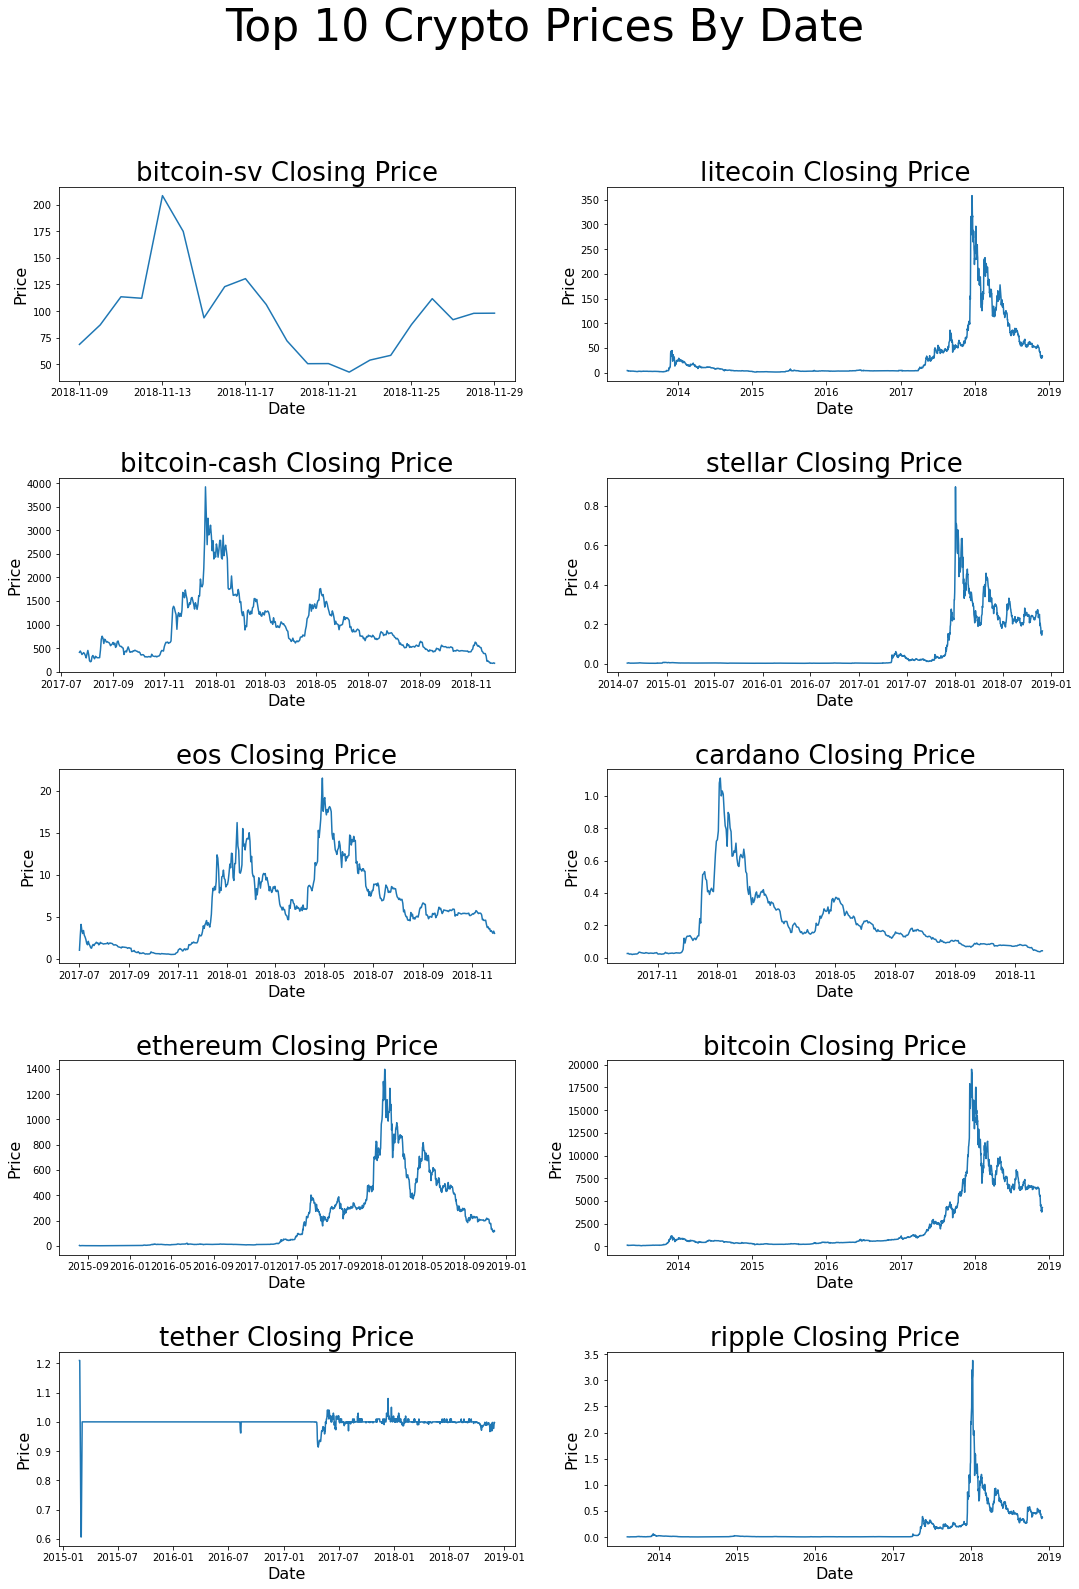

In [13]:
# I will now check a basic plot of each of my major cryptocurrencies for any obvious outliers. I will first check their graphs
# of closing price. Of note in these graphs, tether stands out as a potential outlier, given that its entire price range seems
# to be from 0.6-1.2. This actually makes sense, however, since tether is what is known as a 'stablecoin', which is pegged to
# the U.S. Dollar, and so its value is kept as close to 1 Dollar per tether as possible, though as can be seen in the graph that
# parity is not always maintained. Another thing to note is that not all of these coins have the same date ranges. For instance,
# although bitcoin and litecoin have price information going back to 2014, ethereum, stellar, and others do not. An extreme
# outlier in this regard is bitcoin-sv which only has 21 entries, relative to the thousands of total rows in the dataset. I am
# going to drop bitcoin-sv after demonstrating its paltry number of entries, and make do with a top 9 list of cryptocurrencies
# instead of a top 10 (I'll still have more than enough rows to satisfy my project requirement).

slug_list = list(set(df_top_10.slug))

fig, axes = plt.subplots(5,2, figsize = (18, 25))
counter = 0
for i in range(5):
    for n in range(2):
        axes[i,n].plot(df_top_10[df_top_10['slug'] == slug_list[counter]].date, 
                       df_top_10[df_top_10['slug'] == slug_list[counter]].close)
        axes[i,n].set_title(f"{slug_list[counter]} Closing Price", fontsize = 26)
        axes[i,n].set_xlabel("Date", fontsize = 16)
        axes[i,n].set_ylabel("Price", fontsize = 16)
        counter +=1

plt.subplots_adjust(hspace=0.5)
fig.suptitle("Top 10 Crypto Prices By Date", fontsize = 44)
plt.show()

In [14]:
# As can be seen, there are only 21 rows for bitcoin-sv in this database, which jumped out at me when i saw how 'blocky' its 
# graph above looked. 

df_bitcoin_sv = df_top_10[df_top_10['slug']=='bitcoin-sv']
len(df_bitcoin_sv)

21

In [15]:
# I've created my new df_top_9 dataframe by copying over the original and leaving bitcoin-sv. As can be seen by the number of 
# rows, we are short by exactly 21 rows. I'll also print out a check as to whether or not we have any bitcoin-sv slug entries
# remaining. This was the eighth of five required data transformations, so I've clearly satisfied my basic requirement there,
# but for the sake of being thorough, I will examine the other data as well.

df_top_9 = df_top_10[df_top_10['slug'] != 'bitcoin-sv']
print(f"My new dataframe has {df_top_9.shape[0]} rows, which is {df_top_10.shape[0] - df_top_9.shape[0]} rows fewer than \
before the transformation. \nAlso...")
print(f"The number of rows in my dataframe with the slug value of bitcoin-sv is {(df_top_9.slug == 'bitcoin-sv').sum()}.")

My new dataframe has 11623 rows, which is 21 rows fewer than before the transformation. 
Also...
The number of rows in my dataframe with the slug value of bitcoin-sv is 0.


In [16]:
# I will now examine the basic attributes of my data using a for loop and the describe method paired with some effort in the
# print function to create a readable output. Nothing jumps out at me to suggest there is anything wrong with my data. There is 
# much to sort through, but nothing that seems broken.

for slug_id in set(df_top_9.slug):
    print(slug_id, "\n", df_top_9[df_top_9['slug'] == slug_id].describe(), '\n','-'*100)

litecoin 
        ranknow         open         high          low         mean  \
count   2042.0  2042.000000  2042.000000  2042.000000  2042.000000   
mean       7.0    31.121161    32.520083    29.555940    31.038012   
std        0.0    54.247728    57.142433    50.988352    54.000333   
min        7.0     1.150000     1.340000     1.110000     1.265000   
25%        7.0     3.260000     3.312500     3.210000     3.250000   
50%        7.0     4.165000     4.340000     4.055000     4.155000   
75%        7.0    41.407500    43.145000    38.672500    41.381250   
max        7.0   359.130000   375.290000   335.670000   355.480000   

             close   net_change       spread  volatility_index        volume  \
count  2042.000000  2042.000000  2042.000000       2042.000000  2.042000e+03   
mean     31.123751     0.002591     2.964143          0.558173  1.383520e+08   
std      54.211041     5.146803     8.123746         11.265101  3.523798e+08   
min       1.160000   -54.330000     0.

max    1.308535e+11     1.000000   
 ----------------------------------------------------------------------------------------------------


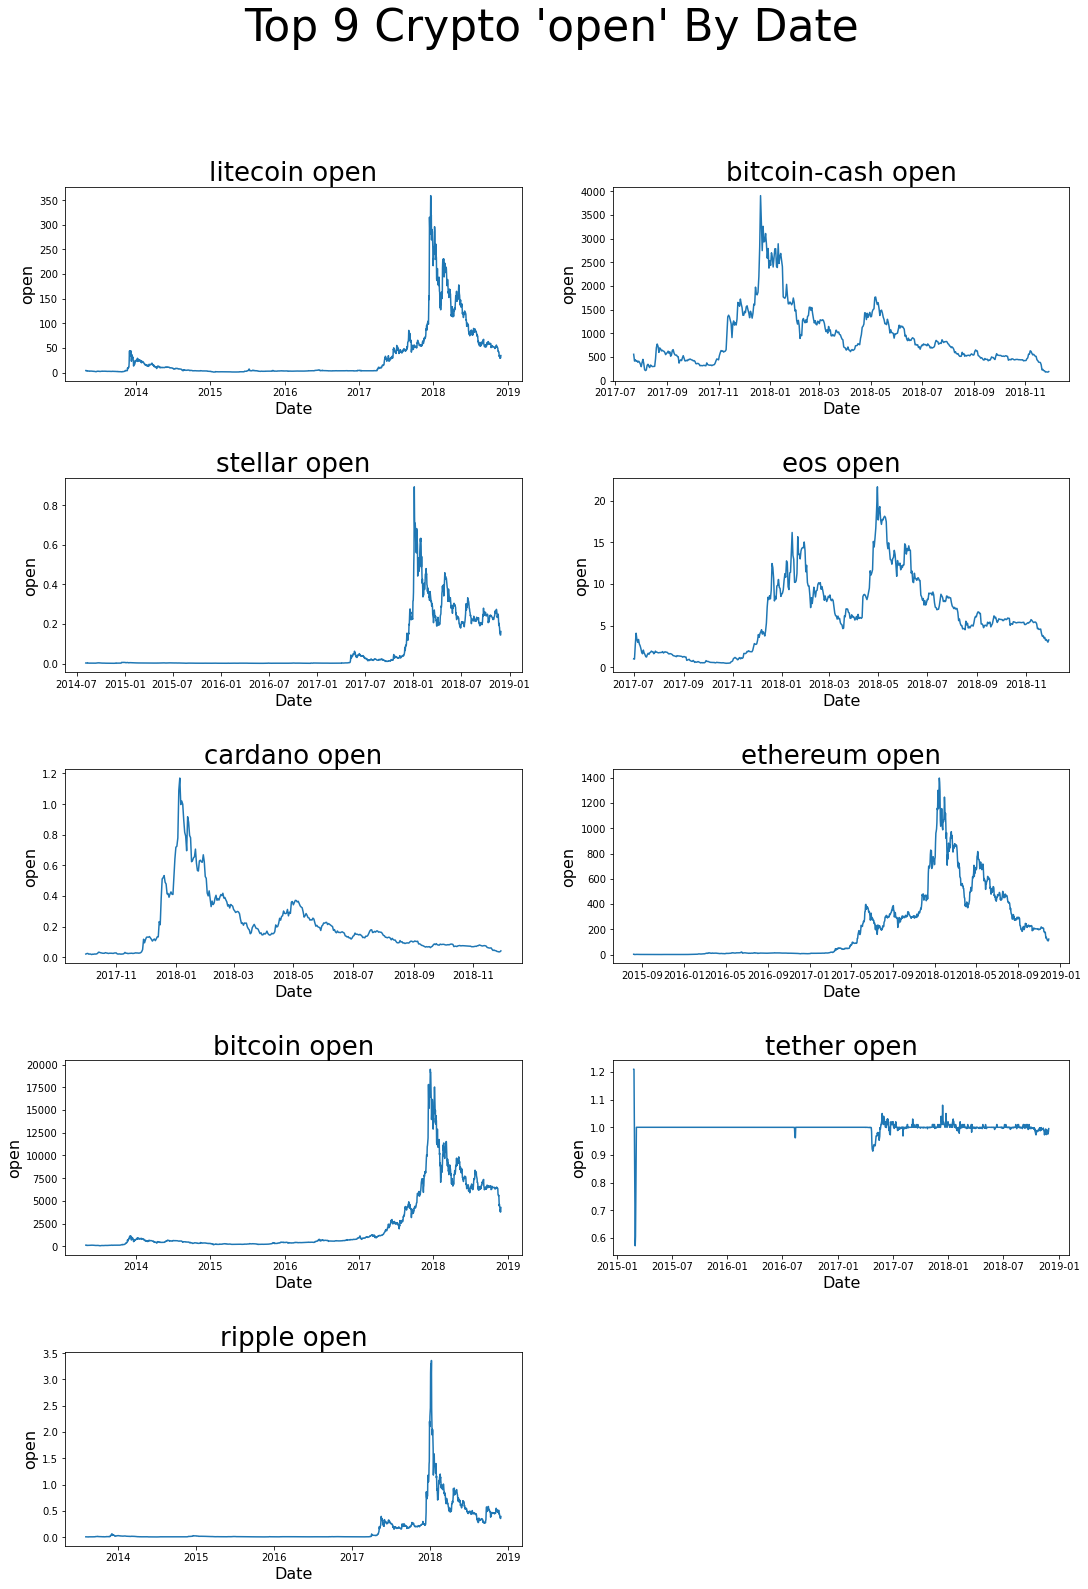

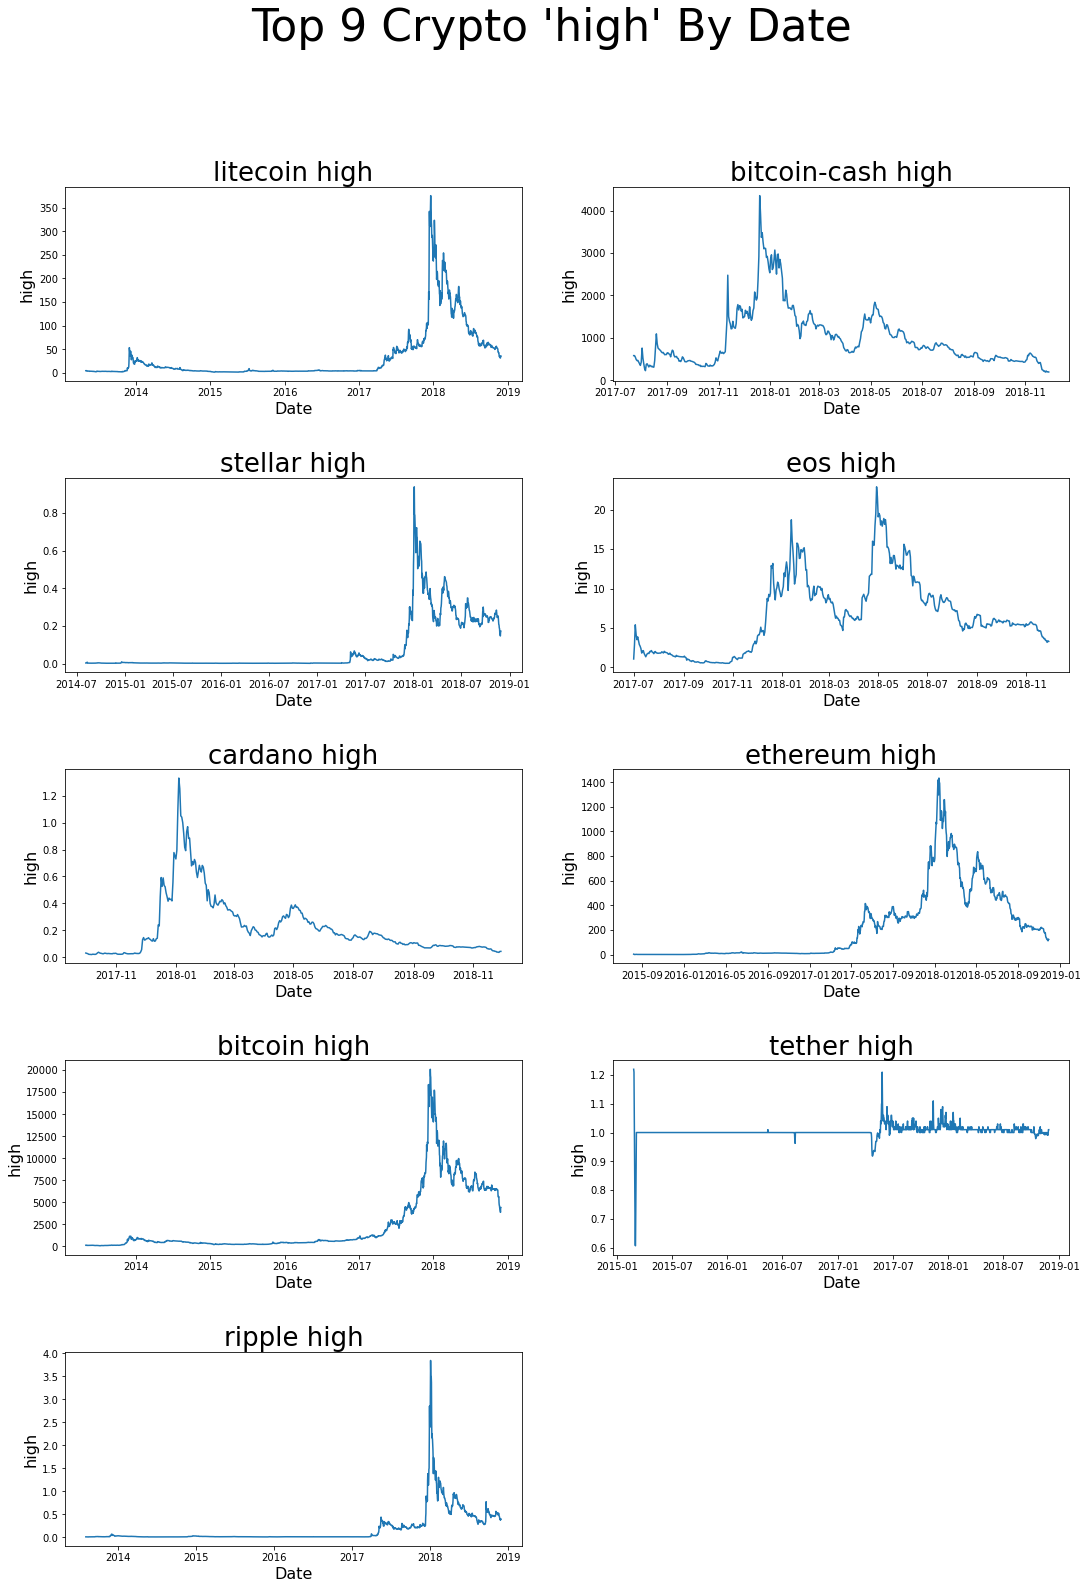

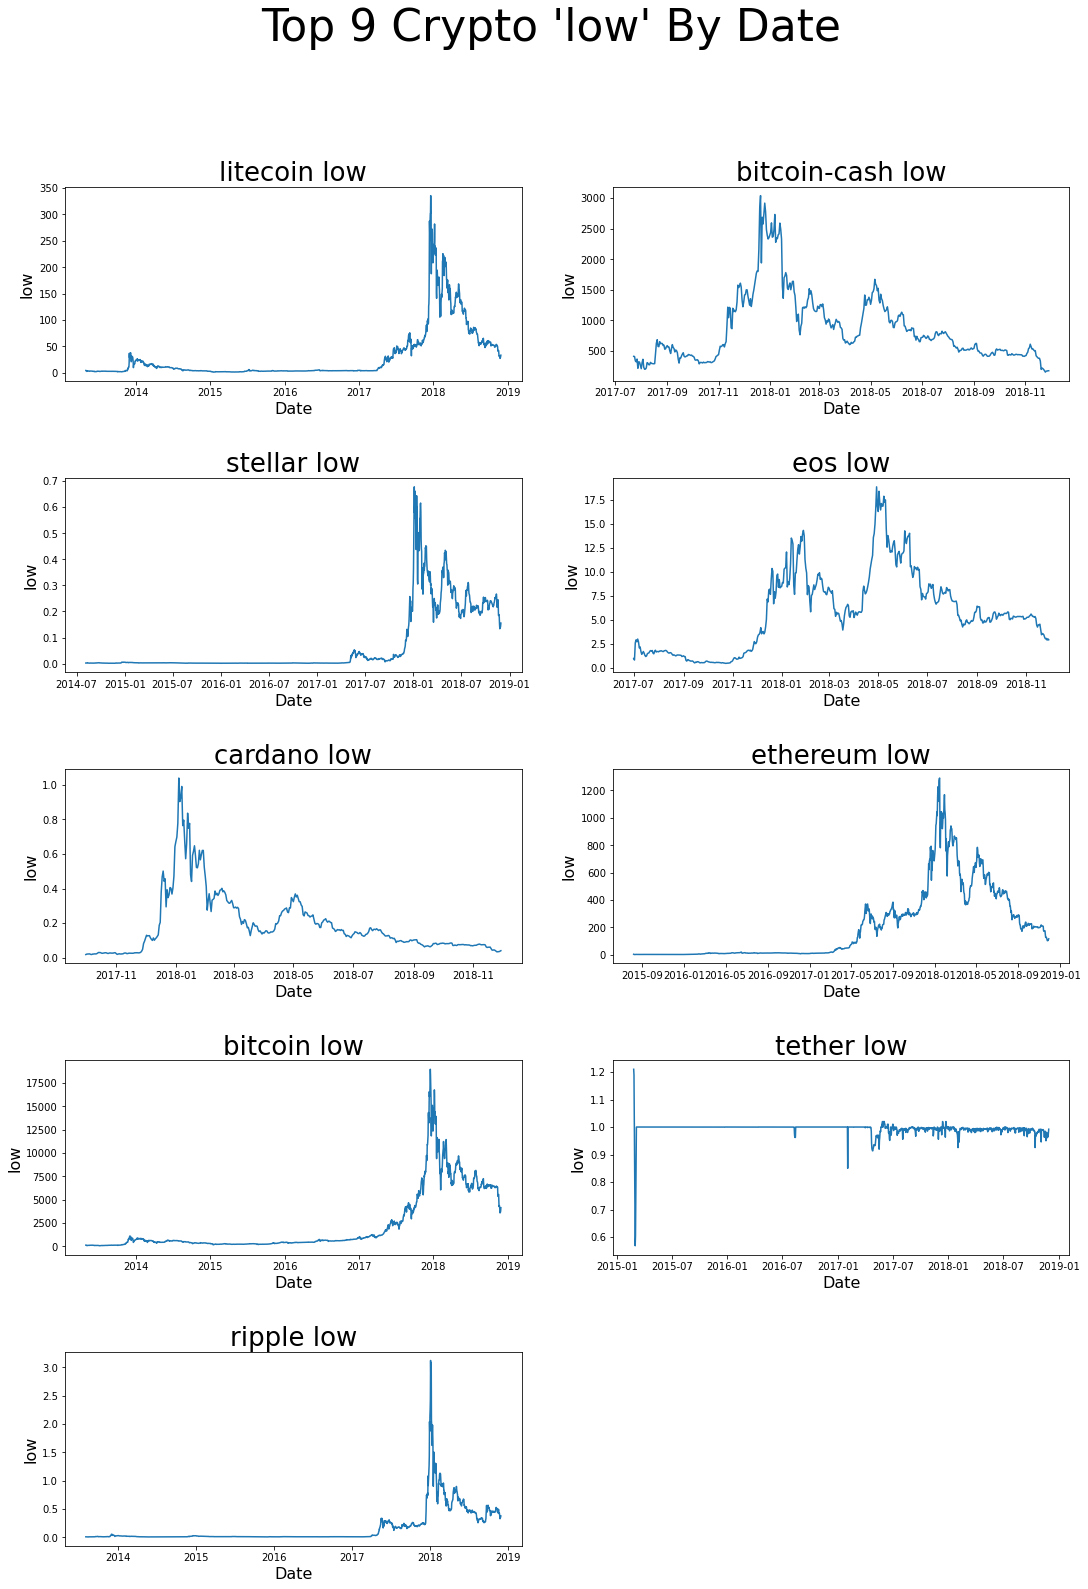

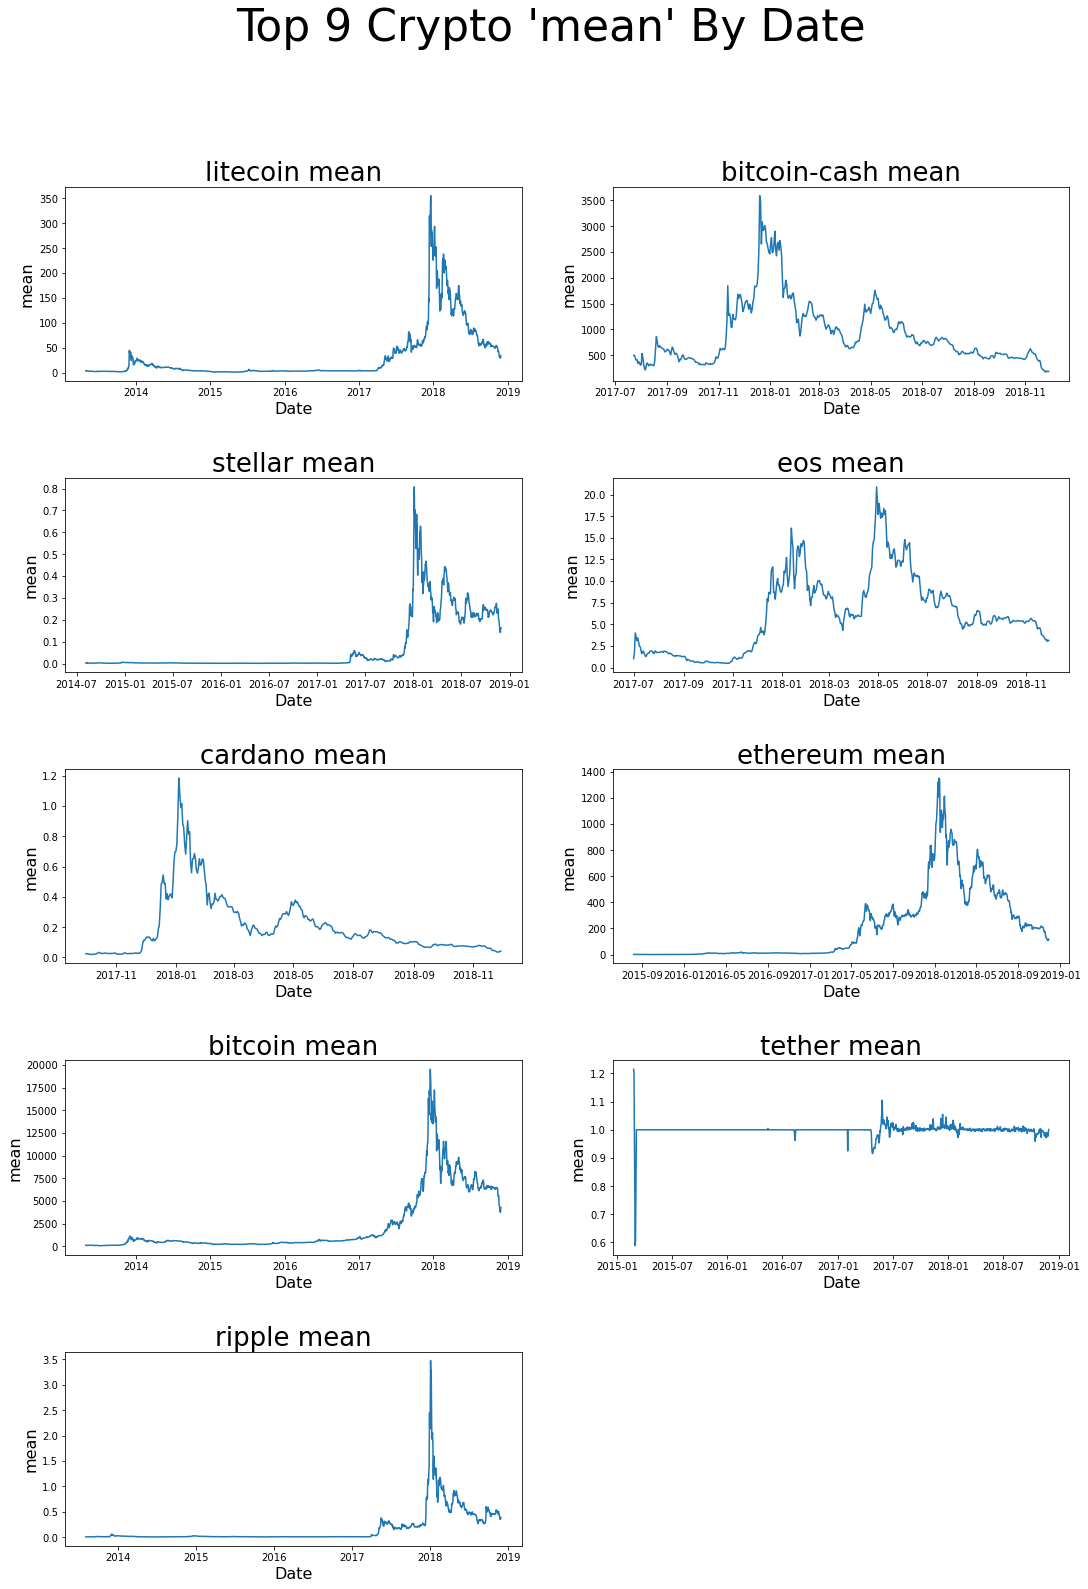

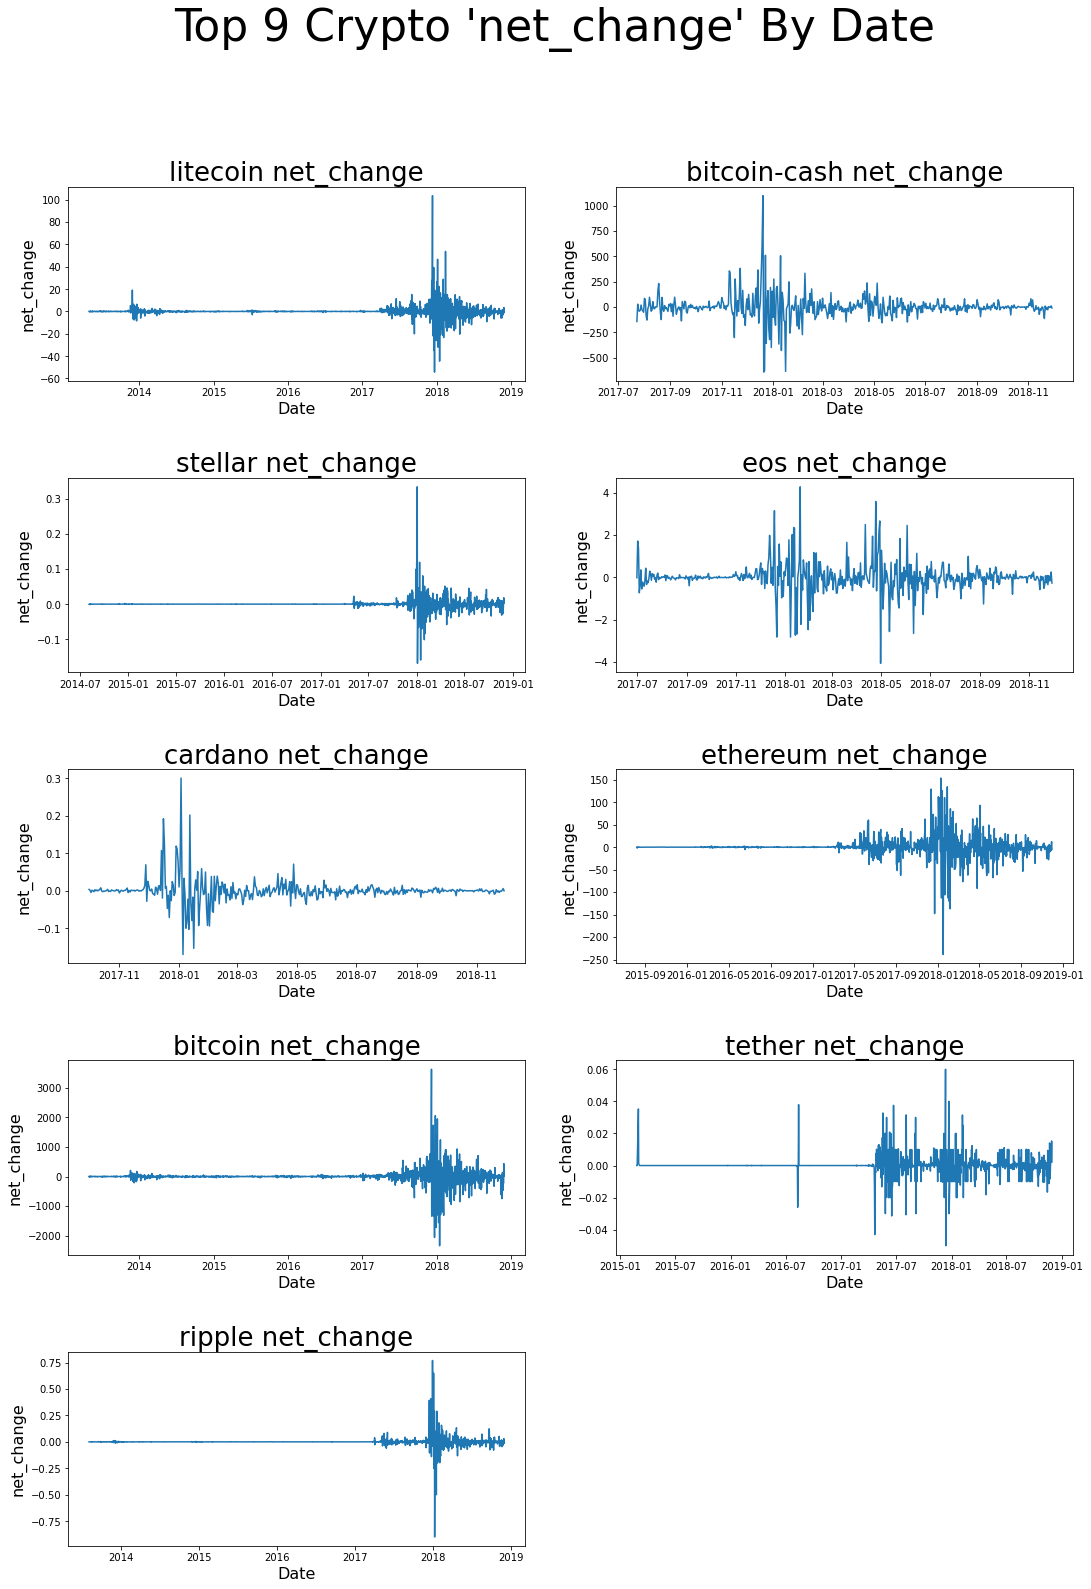

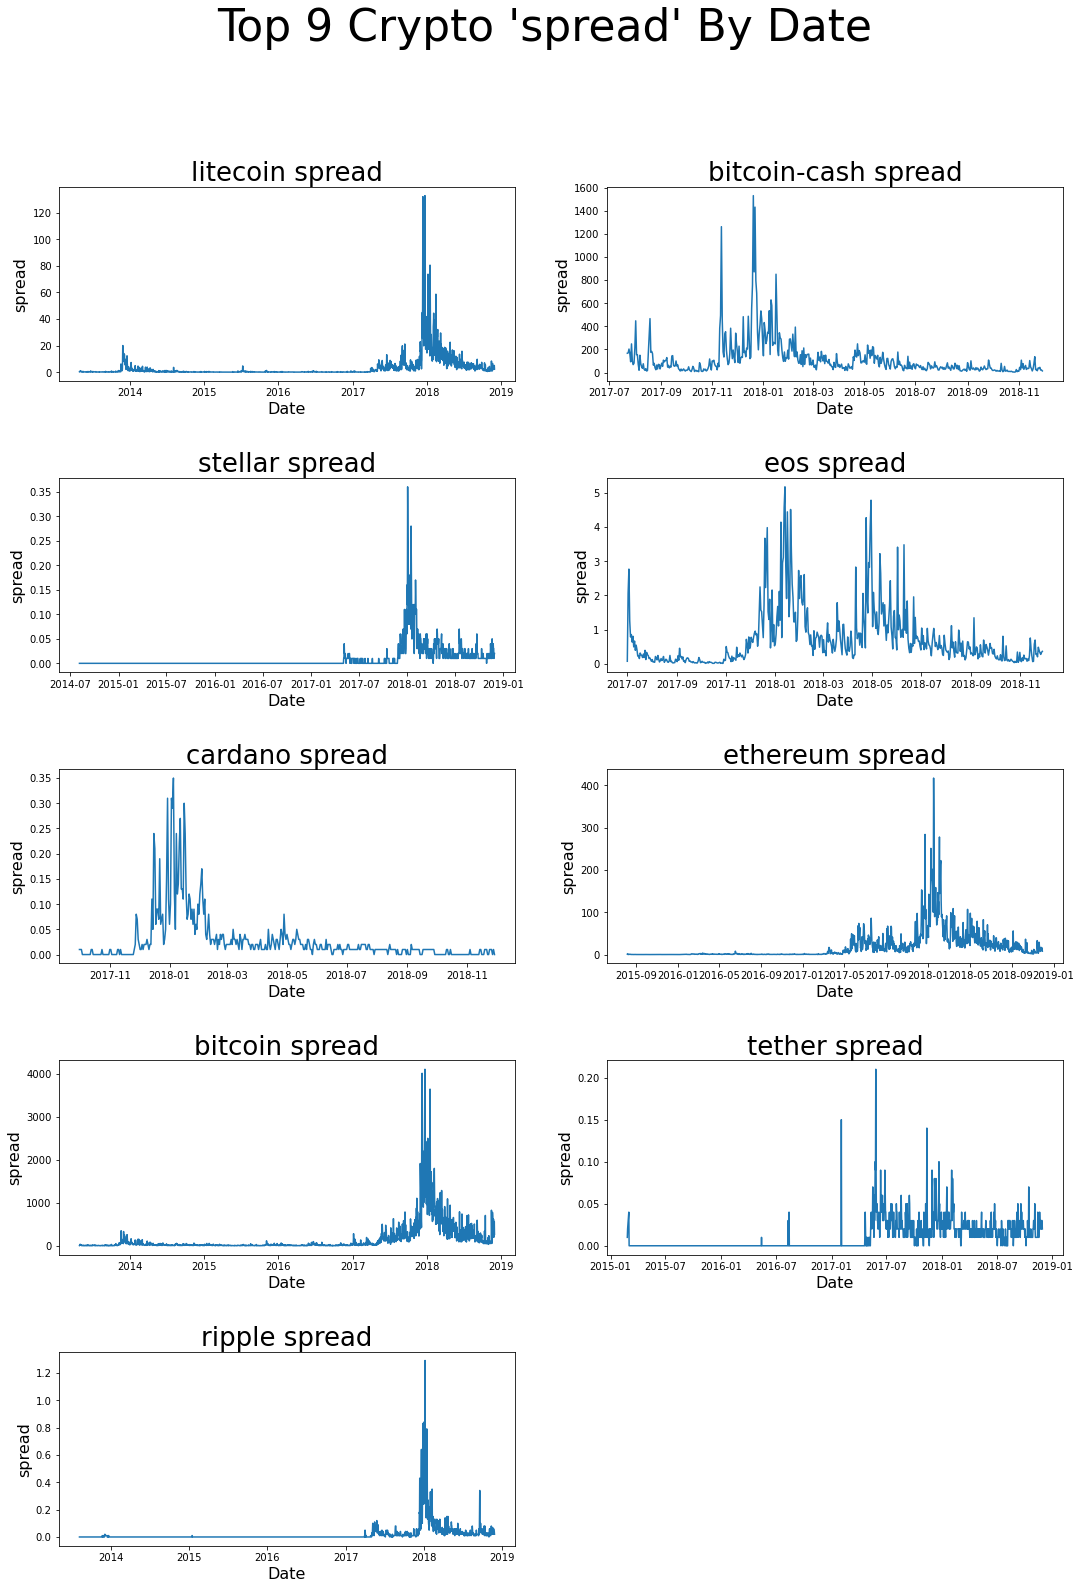

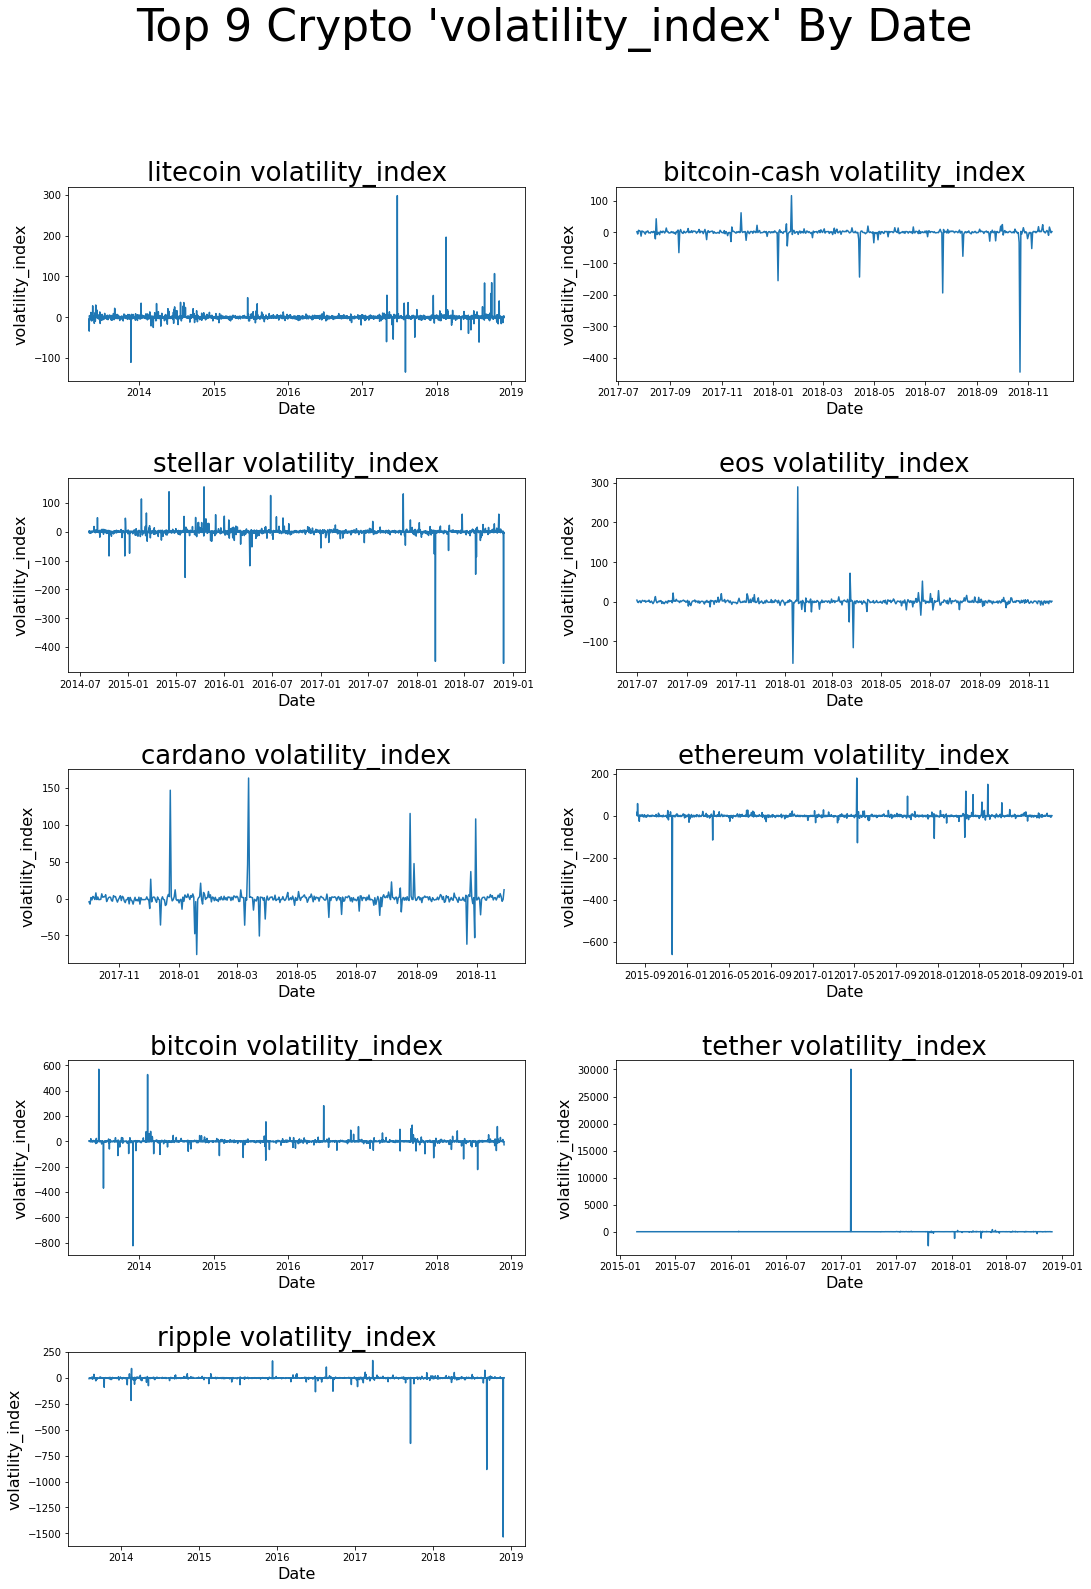

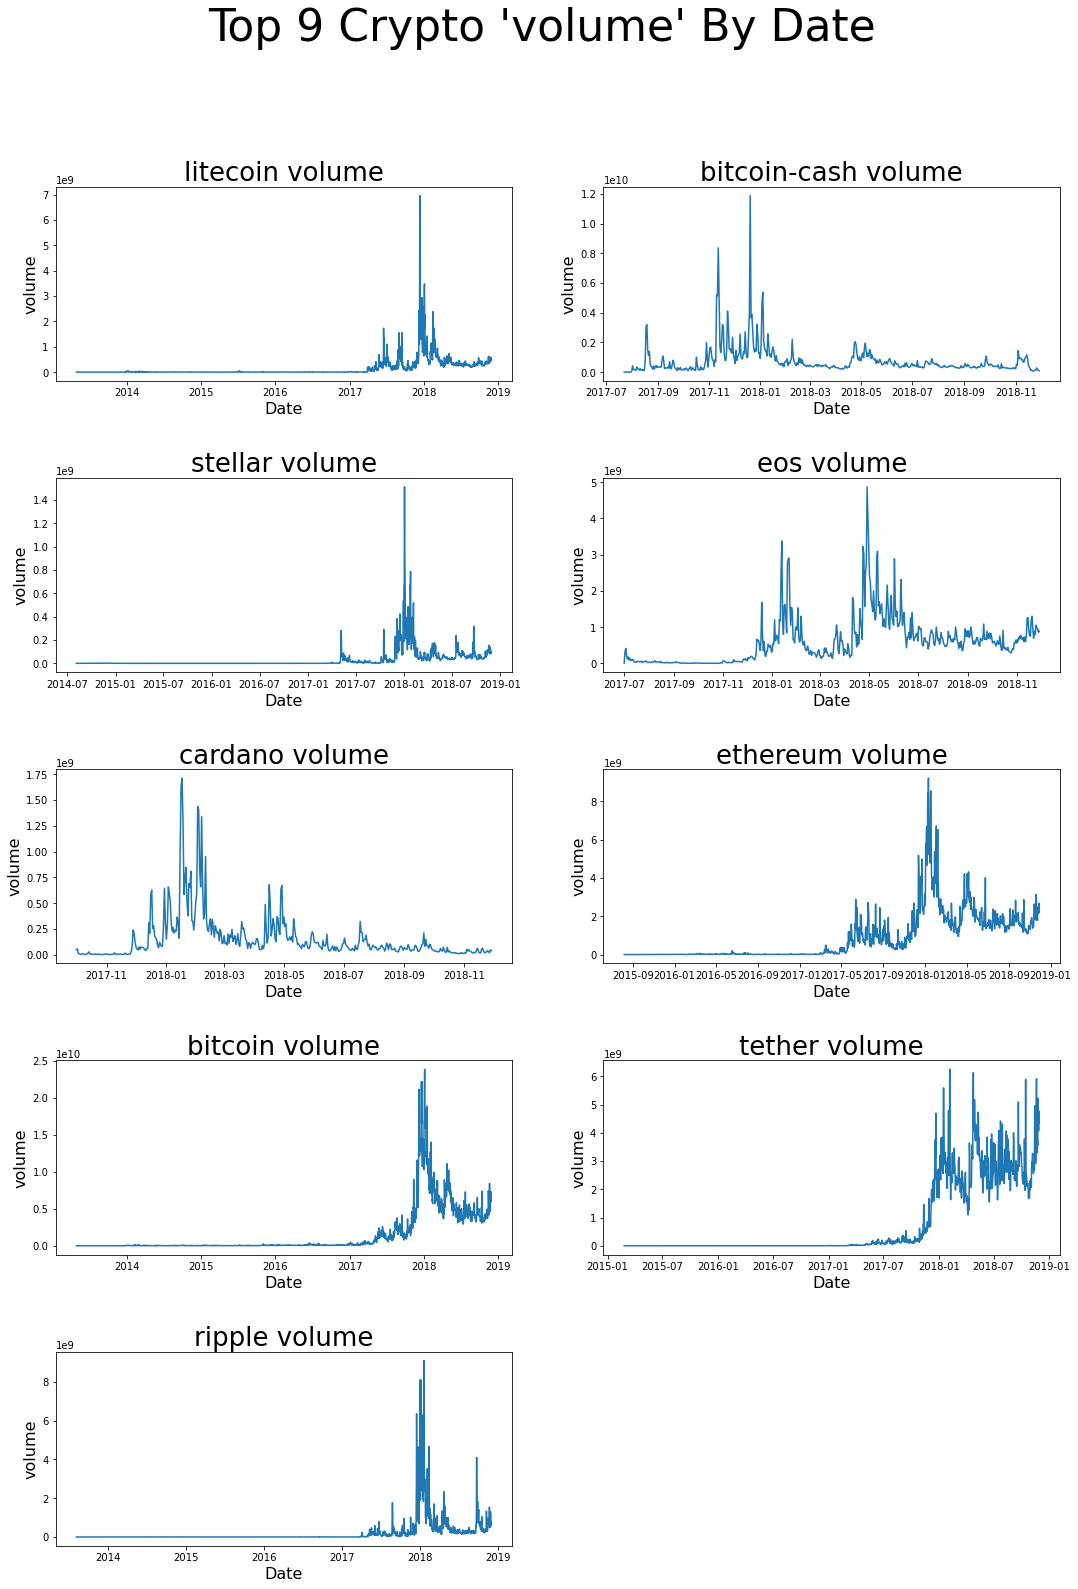

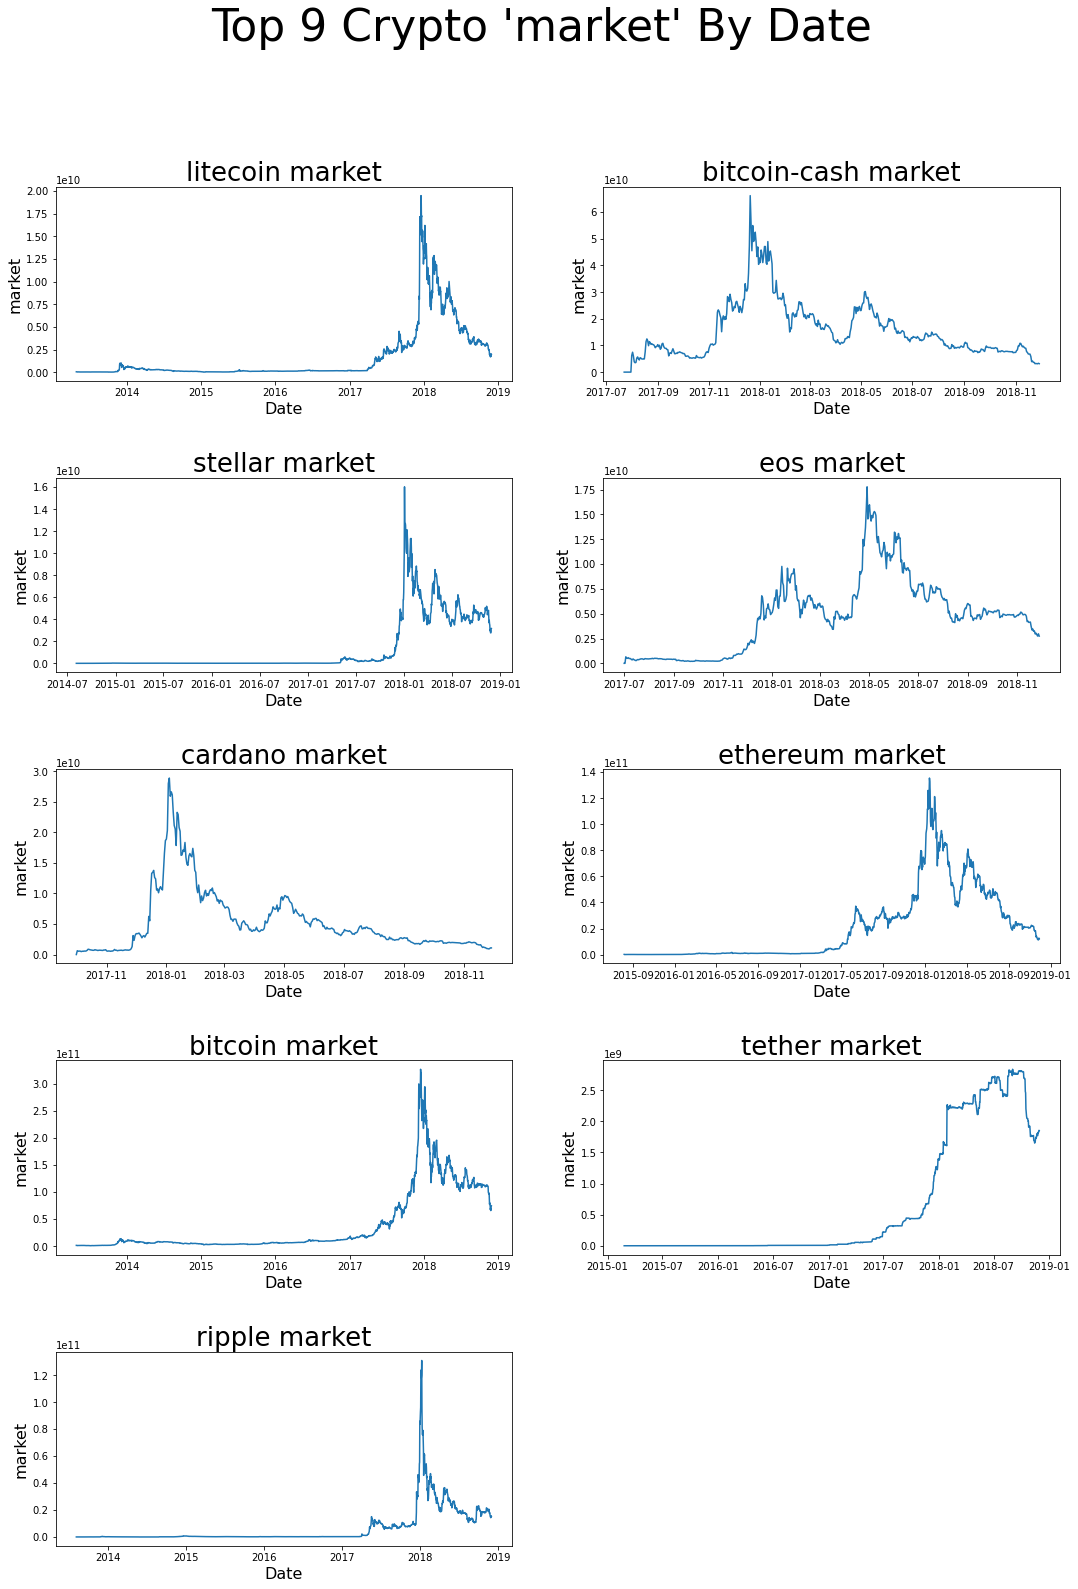

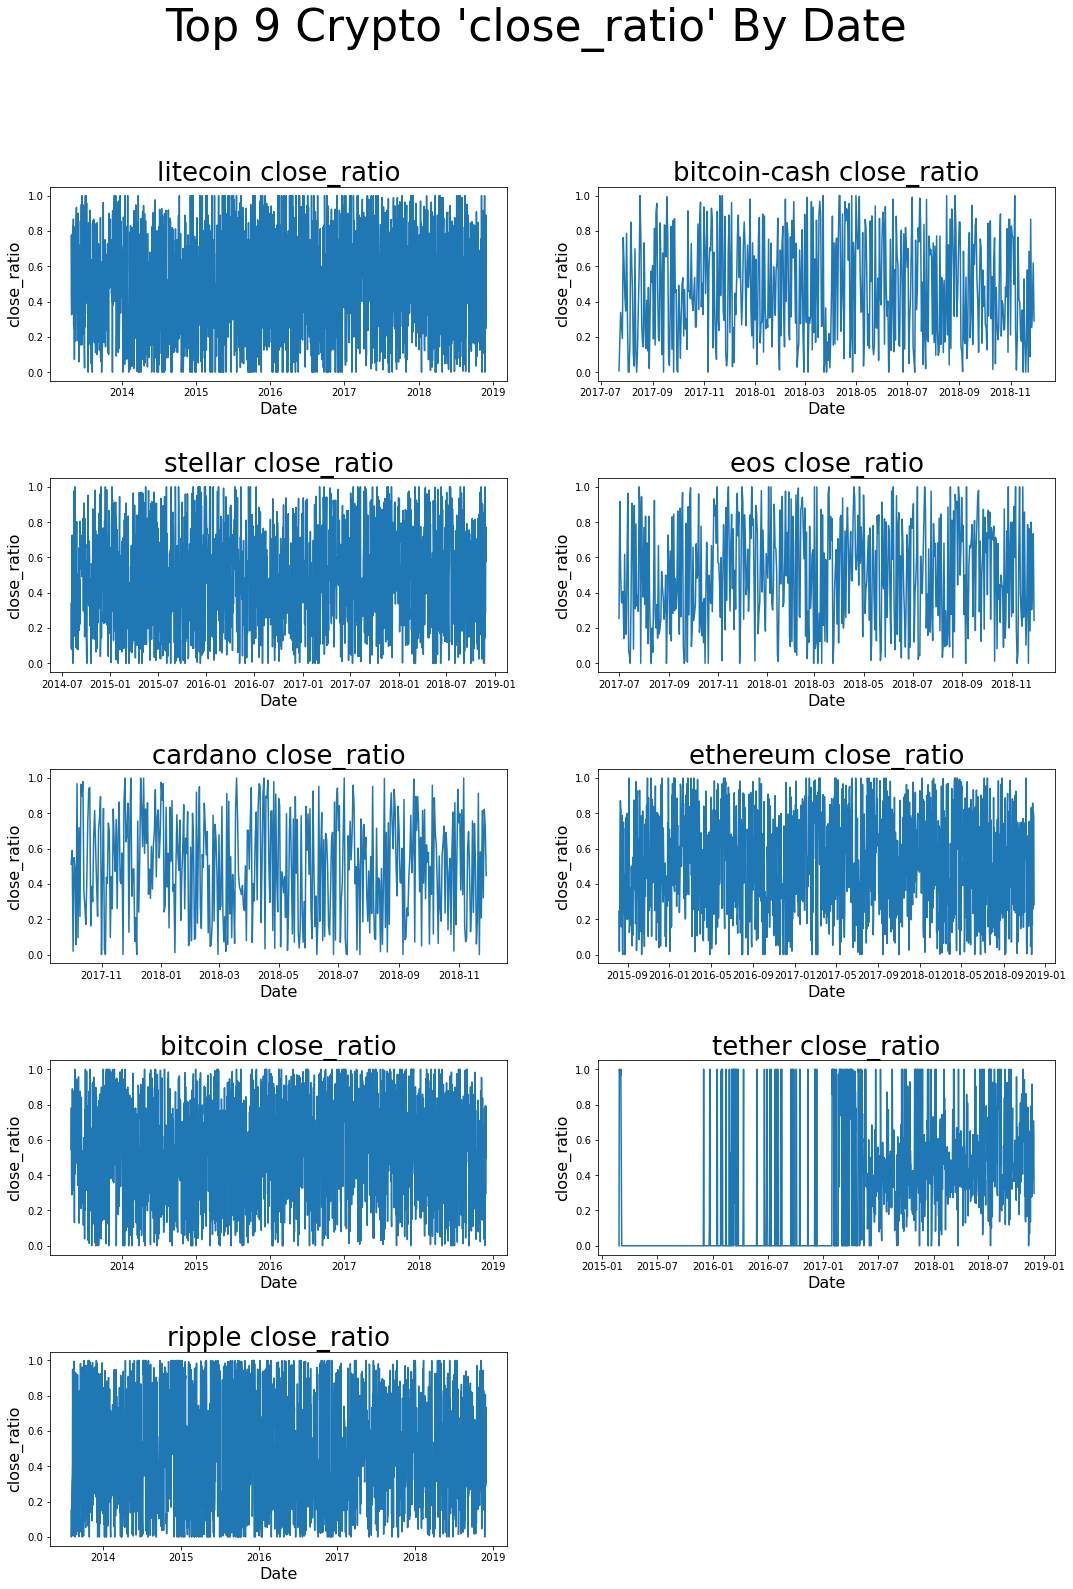

In [17]:
# Below, I added an additional 'for-loop' to the front of my previous graphing code so that I could produce similar clusters of 
# plots for every column of interest. What becomes apparent in this collection of graphs is that my volatility index will biased 
# towards very high values for tether insofar as it deviates from its steady,largely unchanging baseline. This is because on 
# most days there will be very little difference, if any, between the opening and closing price of tether, since it is a 
# stablecoin. Insofar as any temporary market swing occurs, however brief, it will almost assuredly have a denominator that is
# very small (except in the fairly likely case for tether that the open and close prices are the same, given that it is a 
# stablecoin, after all, in which case the volatility index simply becomes the difference between the low and the high for the 
# day which wouldn't be a large value). That being said, the volatility index is less prone to built-in bias in the other 
# crytpocurrencies as none of the other ones are stablecoins. Upon examining the close_ratio, it seems like that data may be
# less useful, at least as far as graphical analysis goes, as it seems to be a small range and fairly noisey. 

column_list = ['open', 'high', 'low', 'mean', 'net_change', 'spread', 'volatility_index', 'volume', 'market', 'close_ratio']

for item in column_list:
    slug_list = list(set(df_top_9.slug))

    fig, axes = plt.subplots(5,2, figsize = (18, 25))
    fig.delaxes(axes[4,1])
    counter = 0
    for i in range(5):
        for n in range(2):
            if i ==4 and n ==1:
                pass
            else:
                axes[i,n].plot(df_top_9[df_top_9['slug'] == slug_list[counter]].date, 
                               df_top_9[df_top_9['slug'] == slug_list[counter]][item])
                axes[i,n].set_title(f"{slug_list[counter]} {item}", fontsize = 26)
                axes[i,n].set_xlabel("Date", fontsize = 16)
                axes[i,n].set_ylabel(item, fontsize = 16)
                counter +=1

    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(f"Top 9 Crypto '{item}' By Date", fontsize = 44)
    plt.show()    

In [18]:
# My final, human-readable dataset as presented in dataframe form, after the various transformations I've carried out.

df_top_9

,slug,symbol,name,date,ranknow,open,high,low,mean,close,net_change,spread,volatility_index,volume,market,close_ratio
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.040000,134.210000,-1.090000,3.88,3.559633,0.0,1.488567e+09,0.5438
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,140.745000,144.540000,10.100000,13.49,-1.335644,0.0,1.603769e+09,0.7813
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,140.490000,139.000000,-5.000000,12.88,2.576000,0.0,1.542813e+09,0.3843
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,123.805000,116.990000,-22.010000,32.17,1.461608,0.0,1.298955e+09,0.2882
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,108.940000,105.210000,-11.170000,33.32,2.982990,0.0,1.168517e+09,0.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,cardano,ADA,Cardano,2018-11-25,10,0.038628,0.038836,0.032798,0.035817,0.037725,-0.000903,0.01,6.686600,40704000.0,9.781065e+08,0.8160
11640,cardano,ADA,Cardano,2018-11-26,10,0.037761,0.039378,0.034117,0.036748,0.035806,-0.001955,0.01,2.691049,31641100.0,9.283447e+08,0.3210
11641,cardano,ADA,Cardano,2018-11-27,10,0.035682,0.036982,0.034029,0.035505,0.036461,0.000779,0.00,-3.790757,17966300.0,9.453295e+08,0.8236
11642,cardano,ADA,Cardano,2018-11-28,10,0.036510,0.044108,0.036510,0.040309,0.042021,0.005511,0.01,-1.378697,47624500.0,1.089471e+09,0.7253


## Ethical Hazards Assessment:

Given that this data is publicly available information which has nothing to do with any person or persons directly or indirectly, there seems to be no potential for the presence of ethical hazards in my work. There are no privacy concerns, nor are there any motives to impute or to be inferred from any of this so there is no chance that any person could be harmed by either this data on its own or the data as I have processed it. Further, since I am not offering financial or investing advice, any inferences anybody wanted to take from my data are at-their-own-risk with no prompting or guarantees from myself. That being  the case, I can neither implicitly nor explicitly mislead anybody since I am not leading them to begin with. As such, this work
as presented has no ethical hazards that I can detect.